<a href="https://colab.research.google.com/github/maitreyi-ashok/codespaces-jupyter/blob/main/SpotifyMusicRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np, pandas as pd, seaborn as sns

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/sample_data/Spotify_data.csv')

In [47]:
df.head(10)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.01070,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.02920,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.35900,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.03750,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.02290,0.000001,0.3110,0.844,151.019
5,5,Type Shit,"Future, Metro Boomin, Travis Scott, Playboi Carti",WE DON'T TRUST YOU,4iqbFIdGOTzXeDtt9owjQn,28drn6tQo95MRvO0jQEo5C,88,2024-03-22,228267,True,...,0.552,2,-5.679,1,0.1290,0.02150,0.000000,0.1190,0.112,144.941
6,6,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",VULTURES 1,30zwjSQEodaUXCn11nmiVF,3w0w2T288dec0mgeZZqoNN,87,2024-02-09,264324,True,...,0.811,1,-5.746,1,0.1590,0.18900,0.000000,0.3390,0.311,148.144
7,7,Prada,"cassö, RAYE, D-Block Europe",Prada,5MU0RmBSpoSxOPYBfcobDc,59NraMJsLaMCVtwXTSia8i,87,2023-08-11,132359,True,...,0.717,8,-5.804,1,0.0375,0.00100,0.000002,0.1130,0.422,141.904
8,8,euphoria,Kendrick Lamar,euphoria,32bR4LcEc1PvJEhaKoo4ZN,77DRzu7ERs0TX3roZcre7Q,88,2024-04-30,383639,True,...,0.643,1,-5.002,1,0.1100,0.04600,0.000000,0.0840,0.142,139.948
9,9,redrum,21 Savage,american dream,2RRYaYHY7fIIdvFlvgb5vq,52eIcoLUM25zbQupAZYoFh,87,2024-01-12,270698,True,...,0.733,2,-8.757,1,0.0488,0.00598,0.000983,0.3750,0.244,172.090


In [7]:
df.describe()

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,113.000000,71.85022,219254.881057,0.635639,0.646665,5.458150,-6.516670,0.678414,0.079576,0.375060,0.028890,0.177797,0.472441,119.466361
std,65.673435,10.24110,60483.492317,0.155123,0.159150,3.760738,2.099543,0.468117,0.085100,0.300084,0.137225,0.121366,0.193902,26.154889
min,0.000000,13.00000,96947.000000,0.271000,0.236000,0.000000,-15.073000,0.000000,0.024600,0.000307,0.000000,0.029700,0.038500,61.311000
25%,56.500000,68.00000,170554.500000,0.552000,0.539500,2.000000,-7.830000,0.000000,0.033800,0.065000,0.000000,0.101000,0.324500,95.457500
50%,113.000000,72.00000,222462.000000,0.634000,0.655000,6.000000,-6.346000,1.000000,0.042100,0.393000,0.000002,0.127000,0.462000,122.925000
75%,169.500000,78.00000,265611.000000,0.746000,0.763500,9.000000,-5.080500,1.000000,0.081200,0.630500,0.000170,0.219000,0.595000,137.952000
max,226.000000,96.00000,383639.000000,0.948000,0.972000,11.000000,-0.424000,1.000000,0.491000,0.940000,0.901000,0.790000,0.972000,187.629000


In [8]:
df.dtypes

,0
Unnamed: 0,int64
Track Name,object
Artists,object
Album Name,object
Album ID,object
Track ID,object
Popularity,int64
Release Date,object
Duration (ms),int64
Explicit,bool


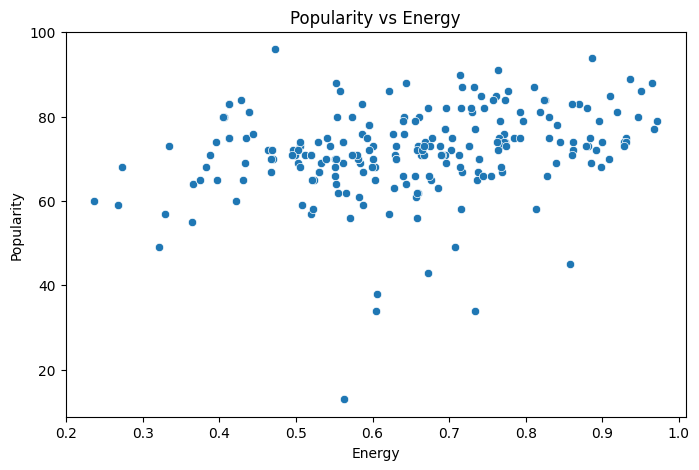

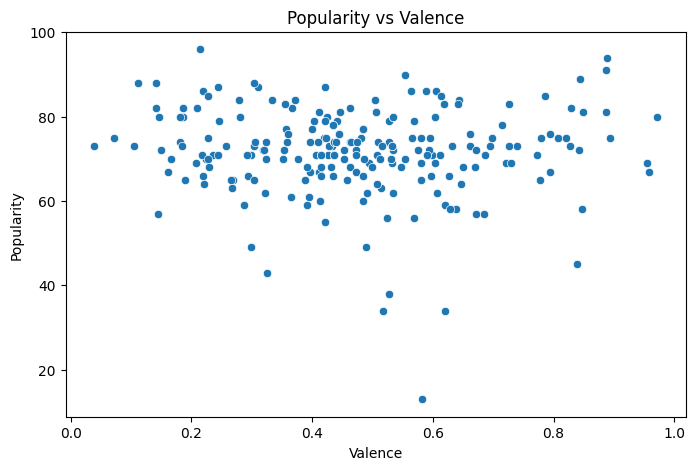

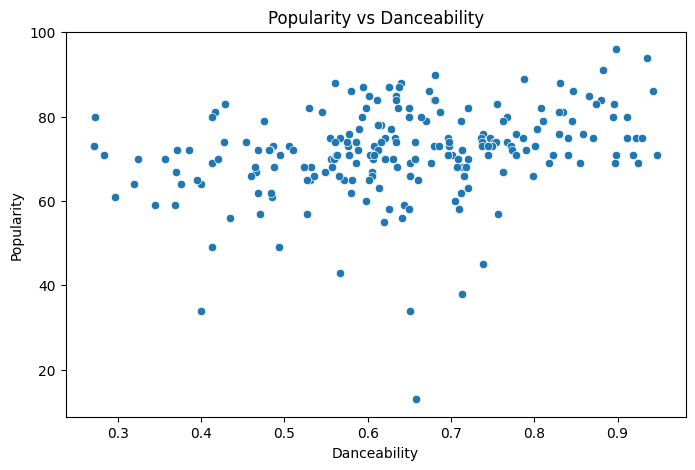

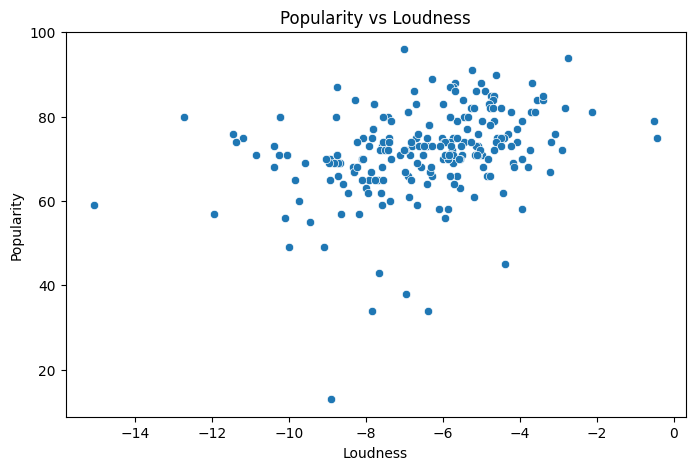

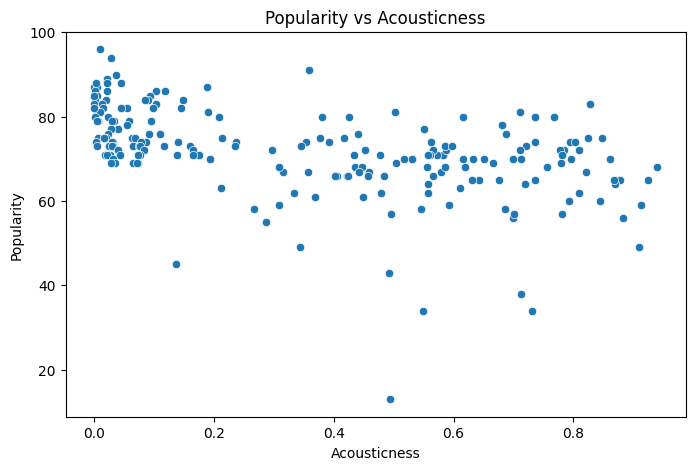

In [9]:
features =['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()


In [10]:
df_noncategorical = df.select_dtypes(include=['number'])
df_noncategorical.corr()


,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Unnamed: 0,1.000000,-0.648005,0.548269,-0.511844,-0.443960,0.030170,-0.342513,0.069230,-0.387342,0.723597,-0.184914,-0.250460,-0.053936,-0.294289
Popularity,-0.648005,1.000000,-0.269510,0.251928,0.250068,-0.008550,0.308110,-0.008246,0.190621,-0.431117,0.104846,0.066110,-0.045580,0.131820
Duration (ms),0.548269,-0.269510,1.000000,-0.484826,-0.365698,-0.012312,-0.256522,0.158170,-0.312642,0.476488,-0.212550,-0.104685,-0.217561,-0.160446
Danceability,-0.511844,0.251928,-0.484826,1.000000,0.242587,-0.013330,0.166232,-0.118235,0.419217,-0.498951,0.077016,0.030781,0.338242,0.232993
Energy,-0.443960,0.250068,-0.365698,0.242587,1.000000,-0.017352,0.678558,-0.063101,0.103059,-0.616124,0.250163,0.239486,0.201095,0.186659
Key,0.030170,-0.008550,-0.012312,-0.013330,-0.017352,1.000000,-0.093016,-0.061717,0.004854,0.055651,0.054473,0.013291,0.093400,0.015901
Loudness,-0.342513,0.308110,-0.256522,0.166232,0.678558,-0.093016,1.000000,0.001383,0.037858,-0.503469,-0.057236,0.121415,0.107138,0.079587
Mode,0.069230,-0.008246,0.158170,-0.118235,-0.063101,-0.061717,0.001383,1.000000,-0.069425,0.147149,-0.079684,-0.096436,-0.004017,-0.159426
Speechiness,-0.387342,0.190621,-0.312642,0.419217,0.103059,0.004854,0.037858,-0.069425,1.000000,-0.367282,0.031381,0.055212,0.148823,0.264213
Acousticness,0.723597,-0.431117,0.476488,-0.498951,-0.616124,0.055651,-0.503469,0.147149,-0.367282,1.000000,-0.126060,-0.267920,-0.021957,-0.404191


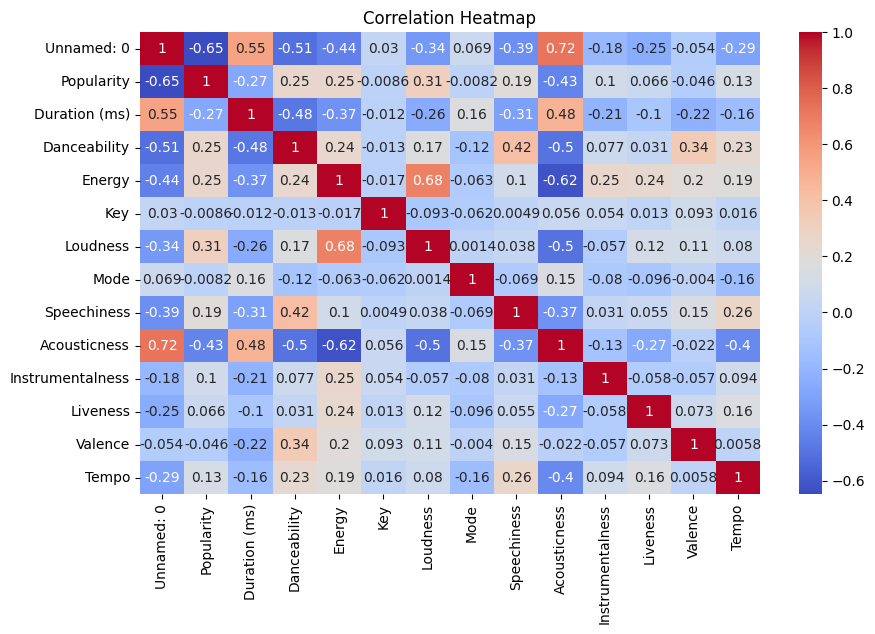

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_noncategorical.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


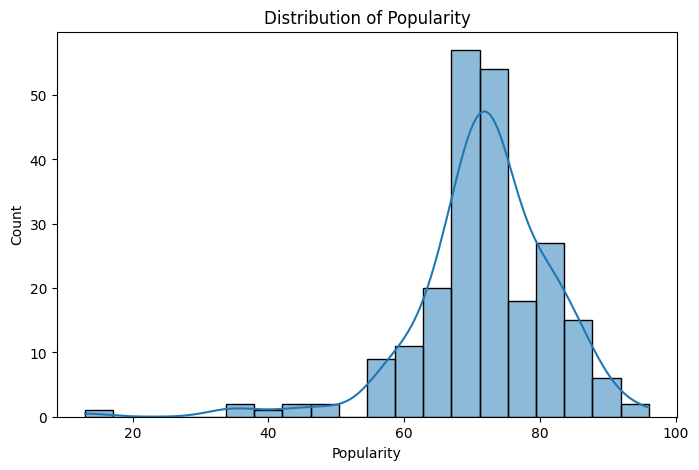

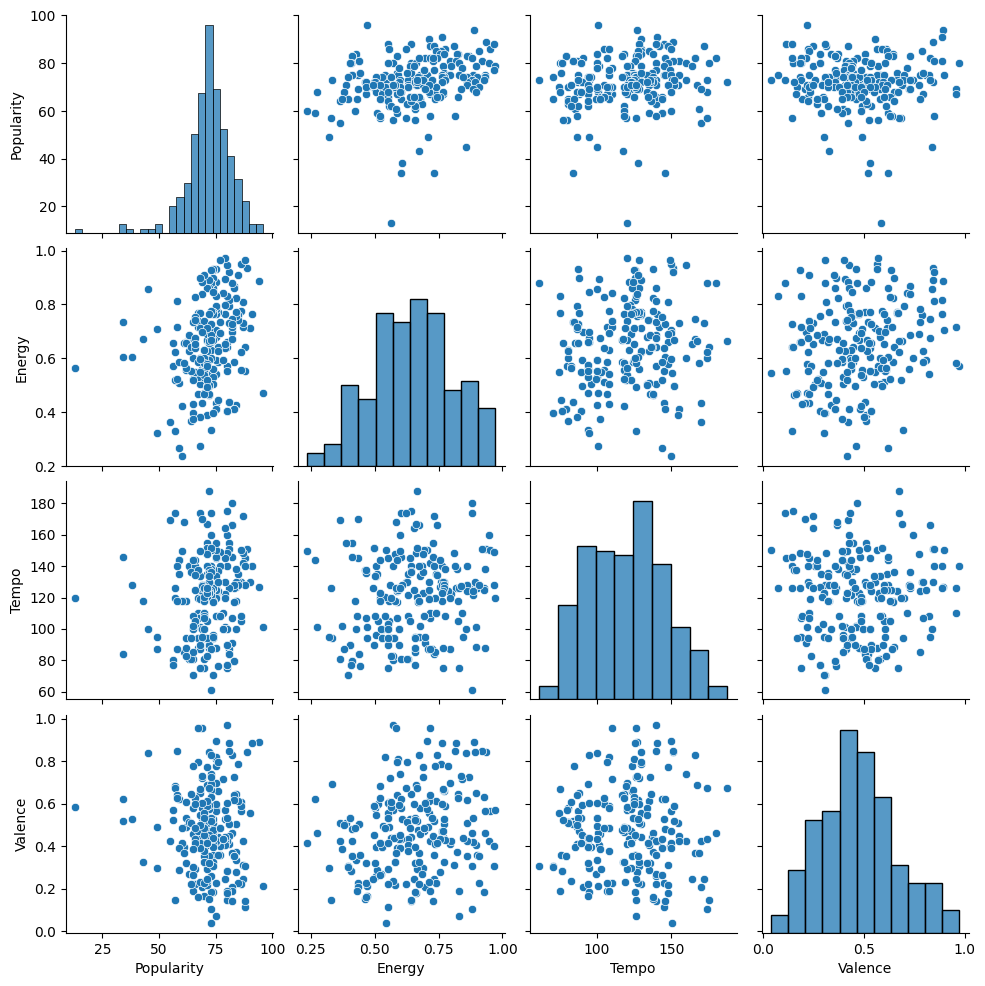

In [12]:

# Distribution of popularity
plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Distribution of Popularity")
plt.show()

# Pairplot for selected features
sns.pairplot(df[["Popularity", "Energy", "Tempo", "Valence"]])
plt.show()

In [13]:
df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/sample_data/Spotify_data.csv')
# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = df[features]
y = df['Popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 59.329352173913044
R² Score: 0.10862745526838957


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 69.33888380441608
R^2 Score: -0.04175715798171287


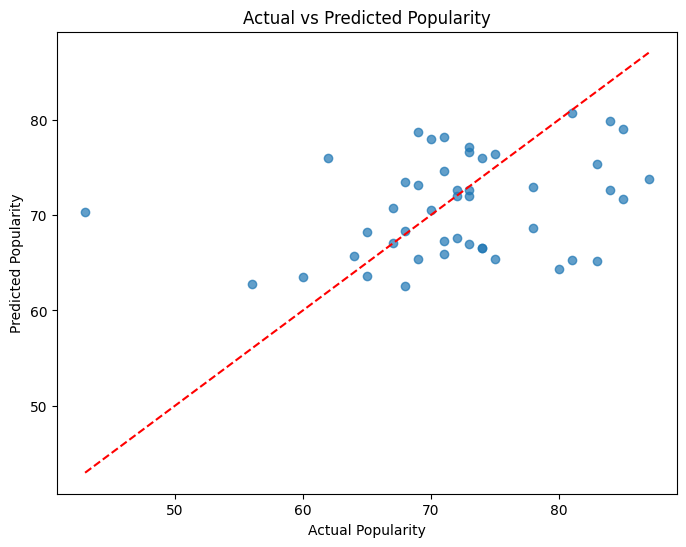

In [16]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    "max_features": ["sqrt"]  # Number of features to consider at every split
}

# Select features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = df[features]
y = df['Popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',
    random_state=42
)

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="r2", n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)




Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 47.85741141304347
R^2 Score: 0.28098350930133487


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


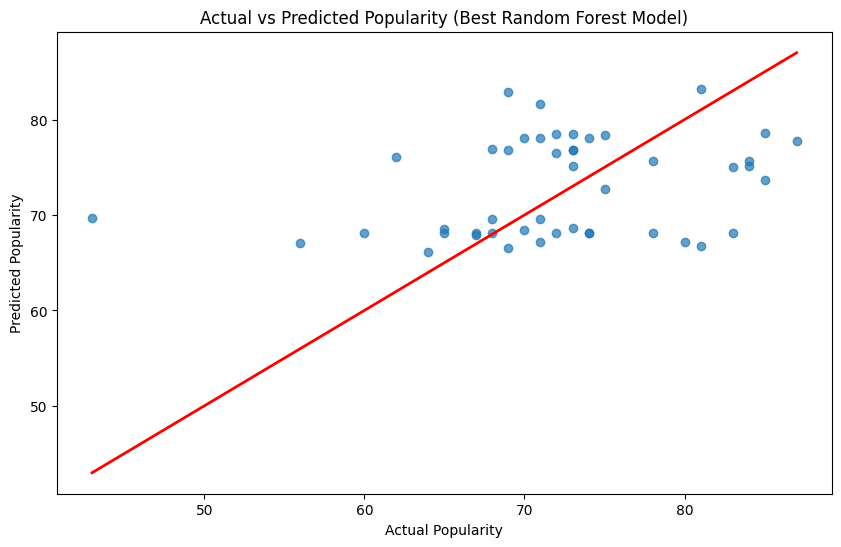

In [25]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a simple model to check feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
for i in sorted_idx[:10]:  # Show top 10 features
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Acousticness: 0.3384
Liveness: 0.1252
Danceability: 0.1073
Speechiness: 0.1055
Valence: 0.0857
Tempo: 0.0847
Energy: 0.0827
Loudness: 0.0704


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('/content/sample_data/Spotify_data.csv')

# Preprocess the data (same as before)
# Select features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = df[features]
y = df['Popularity']


# Check for non-numeric columns
print(df.dtypes)

# Drop any remaining non-numeric columns (if necessary)
# For example, if there's a column with URLs, drop it
df = df.drop(columns=[col for col in df.columns if df[col].dtype == "object"])
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation="relu"),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(16, activation="relu"),  # Hidden layer
    Dense(1)  # Output layer (regression, no activation)
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Unnamed: 0            int64
Track Name           object
Artists              object
Album Name           object
Album ID             object
Track ID             object
Popularity            int64
Release Date         object
Duration (ms)         int64
Explicit               bool
External URLs        object
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
dtype: object
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5340.3828 - mae: 72.3969 - val_loss: 4989.3413 - val_mae: 69.9868
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5280.4336 - mae: 71.8682 - val_loss: 4965.8311 - val_mae: 69.8180
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5215.8813 - mae: 71.2760 - val_loss: 4943.1392 - val_mae: 69.6532
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5105.2725 - mae: 70.4735 - val_loss: 4916.2061 - val_mae: 69.4563
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5203.5742 - mae: 71.3498 - val_loss: 4883.4009 - val_mae: 69.2154
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5255.9995 - mae: 71.4390 - val_loss: 4842.5767 - val_mae: 68.9132
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5077.6733 - mae: 70.0910 - val_loss: 4792.3672 - val_mae: 68.5405
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5087.2568 - mae: 70.6064 - val_loss: 4729.6064 - val_mae: 68.0737
Epoch 9/50
5/5 ━━━━━━━━━━━━

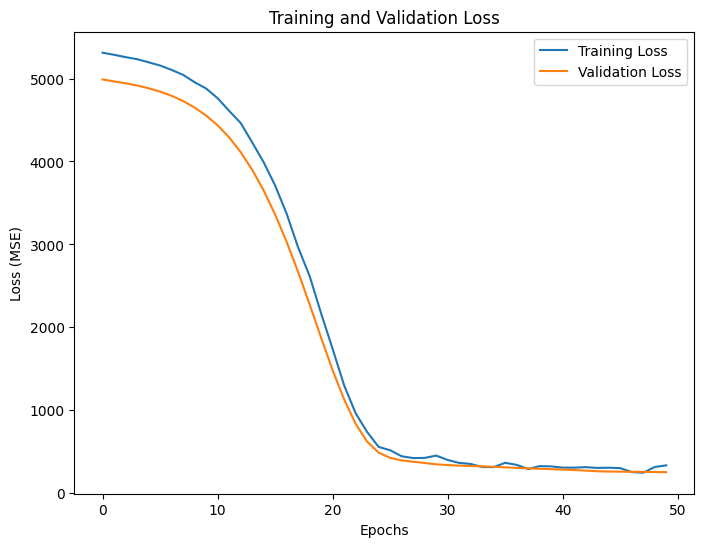

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


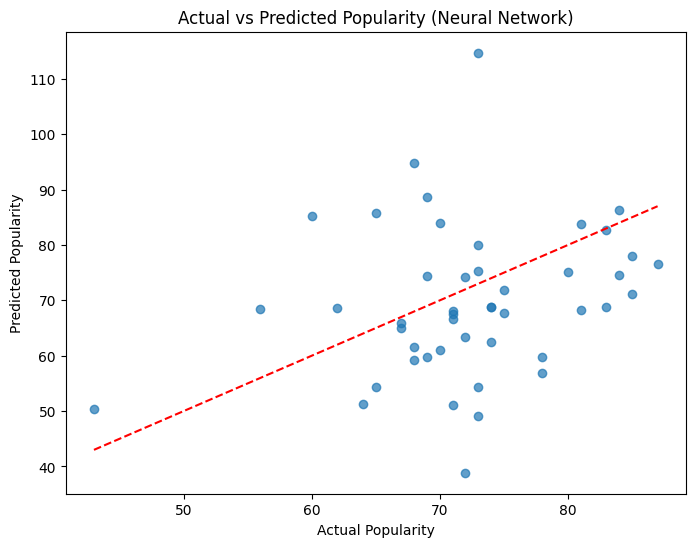

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Neural Network)")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 3.0697 - mae: 1.3342 - val_loss: 0.6121 - val_mae: 0.5772
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.0566 - mae: 1.3294 - val_loss: 0.5825 - val_mae: 0.5508
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.7038 - mae: 0.9610 - val_loss: 0.5697 - val_mae: 0.5396
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7268 - mae: 0.9682 - val_loss: 0.5657 - val_mae: 0.5346
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4757 - mae: 0.9304 - val_loss: 0.5640 - val_mae: 0.5366
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6095 - mae: 0.9863 - val_loss: 0.5694 - val_mae: 0.5435
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2725 - mae: 0.8531 - val_loss: 0.5760 - val_mae: 0.5482
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.4075 - mae: 0.9344 - val_loss: 0.5777 - val_mae: 0.5503
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.3245 - mae: 0.8741 -

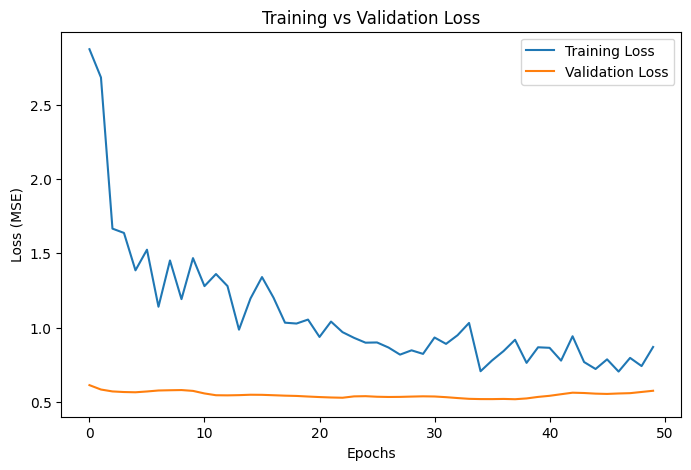

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
df = pd.read_csv('/content/sample_data/Spotify_data.csv')

# Feature Selection: Keeping only relevant columns
features = ['Acousticness', 'Liveness', 'Danceability', 'Speechiness',
            'Valence', 'Tempo', 'Energy', 'Loudness', 'Popularity']
df = df[features]

# 1️⃣ Handle Missing Values (if any)
df.dropna(inplace=True)

# 2️⃣ Log Transformation (for skewed features)
for col in ['Acousticness', 'Danceability', 'Speechiness','Energy']:
    df[col] = np.log1p(df[col])

# 3️⃣ Feature Interaction (Multiplication)
df['Acousticness_Danceability'] = df['Acousticness'] * df['Danceability']
df['Acousticness_Speechiness'] = df['Acousticness'] * df['Speechiness']
df['Danceability_Valence'] = df['Danceability'] * df['Valence']
df['Energy_Loudness'] = df['Energy'] * df['Loudness']

# 4️⃣ Binning Acousticness into 3 Categories
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['Acousticness_Binned'] = kbins.fit_transform(df[['Acousticness']])

# 5️⃣ Scaling & Normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 6️⃣ Splitting Data
X = df_scaled.drop(columns=['Popularity'])
y = df_scaled['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Neural Network Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1)  # Regression output
])

# 8️⃣ Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# 9️⃣ Train Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# 🔟 Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()